In [2]:
!git clone https://github.com/JASCRAJ/stylized-neural-painting.git

Cloning into 'stylized-neural-painting'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 208 (delta 79), reused 61 (delta 61), pack-reused 110 (from 1)
Receiving objects: 100% (208/208), 6.21 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [3]:
cd stylized-neural-painting

/content/stylized-neural-painting


download checkpoints_G_oilpaintbrush.zip file and upload it in your workin google drive

pre-trained renderer download link :https://drive.google.com/file/d/1sqWhgBKqaBJggl2A8sD1bLSq2_B1ScMG/view?usp=sharing

In [1]:
!pip install -q gdown

In [4]:

import gdown
import zipfile
import os


gdrive_link = 'https://drive.google.com/file/d/1sqWhgBKqaBJggl2A8sD1bLSq2_B1ScMG/view?usp=sharing'

# Extract the file ID from the link
file_id = gdrive_link.split('/d/')[1].split('/')[0]
download_url = f'https://drive.google.com/uc?id={file_id}'

#Download the ZIP file
output = 'checkpoints_G_oilpaintbrush.zip'
gdown.download(download_url, output, quiet=False)

# Unzip the file
unzip_path = '/content/stylized-neural-painting/'
os.makedirs(unzip_path, exist_ok=True)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

print(f"Files extracted to: {unzip_path}")


Downloading...
From (original): https://drive.google.com/uc?id=1sqWhgBKqaBJggl2A8sD1bLSq2_B1ScMG
From (redirected): https://drive.google.com/uc?id=1sqWhgBKqaBJggl2A8sD1bLSq2_B1ScMG&confirm=t&uuid=f07098f8-607c-41a5-b4e7-c3f0d4b190c6
To: /content/stylized-neural-painting/checkpoints_G_oilpaintbrush.zip
100%|██████████| 181M/181M [00:03<00:00, 56.3MB/s]


Files extracted to: /content/stylized-neural-painting


In [ ]:
!python demo.py --img_path ./test_images/NST_test.jpg --canvas_color 'white' --max_m_strokes 1000 --m_grid 5 --renderer oilpaintbrush --renderer_checkpoint_dir checkpoints_G_oilpaintbrush --net_G zou-fusion-net --output_dir ./output

initialize network with normal
loading renderer from pre-trained checkpoint...
begin to draw...
iteration step 0, G_loss: 0.00000, step_psnr: 5.18182, strokes: 25 / 1000
iteration step 1, G_loss: 0.50811, step_psnr: 5.19720, strokes: 25 / 1000
iteration step 2, G_loss: 0.50629, step_psnr: 5.21050, strokes: 25 / 1000
iteration step 3, G_loss: 0.50479, step_psnr: 5.22211, strokes: 25 / 1000
iteration step 4, G_loss: 0.50346, step_psnr: 5.23373, strokes: 25 / 1000
iteration step 5, G_loss: 0.50222, step_psnr: 5.24515, strokes: 25 / 1000
iteration step 6, G_loss: 0.50099, step_psnr: 5.25617, strokes: 25 / 1000
iteration step 7, G_loss: 0.49987, step_psnr: 5.26632, strokes: 25 / 1000
iteration step 8, G_loss: 0.49876, step_psnr: 5.27728, strokes: 25 / 1000
iteration step 9, G_loss: 0.49761, step_psnr: 5.28723, strokes: 25 / 1000
iteration step 10, G_loss: 0.49659, step_psnr: 5.29761, strokes: 25 / 1000
iteration step 11, G_loss: 0.49547, step_psnr: 5.30838, strokes: 25 / 1000
iteration step

results visualisation

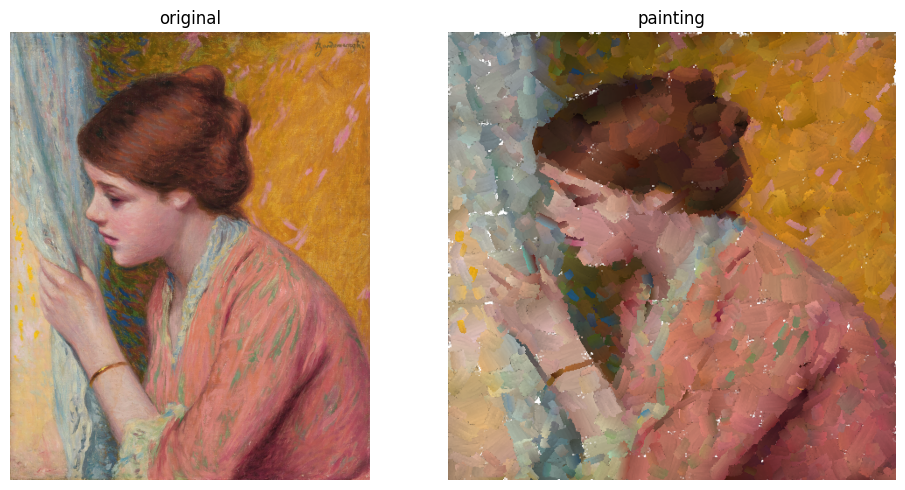

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load your images
before = cv2.imread('/content/stylized-neural-painting/test_images/NST_test.jpg')      # Replace with your image path
after = cv2.imread('/content/stylized-neural-painting/output/NST_test_rendered_stroke_0997.png')        # Replace with your image path

# Convert BGR (OpenCV default) to RGB for displaying correctly with matplotlib
before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

# Plot side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(before)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(after)
plt.title('painting')
plt.axis('off')

plt.tight_layout()
plt.show()


Now ,we combine the painting sytle

In [ ]:
!python demo_nst.py --renderer oilpaintbrush --vector_file ./output/NST_test_strokes.npz --style_img_path ./style_images/mosaic.jpg --content_img_path ./test_images/NST_test.jpg --canvas_color 'white' --net_G zou-fusion-net --renderer_checkpoint_dir checkpoints_G_oilpaintbrush --transfer_mode 1

initialize network with normal
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:07<00:00, 70.7MB/s]
loading pre-generated vector file...
loading renderer from pre-trained checkpoint...
running style transfer... iteration step 0, G_loss: 0.00000, step_psnr: 25.81387
running style transf

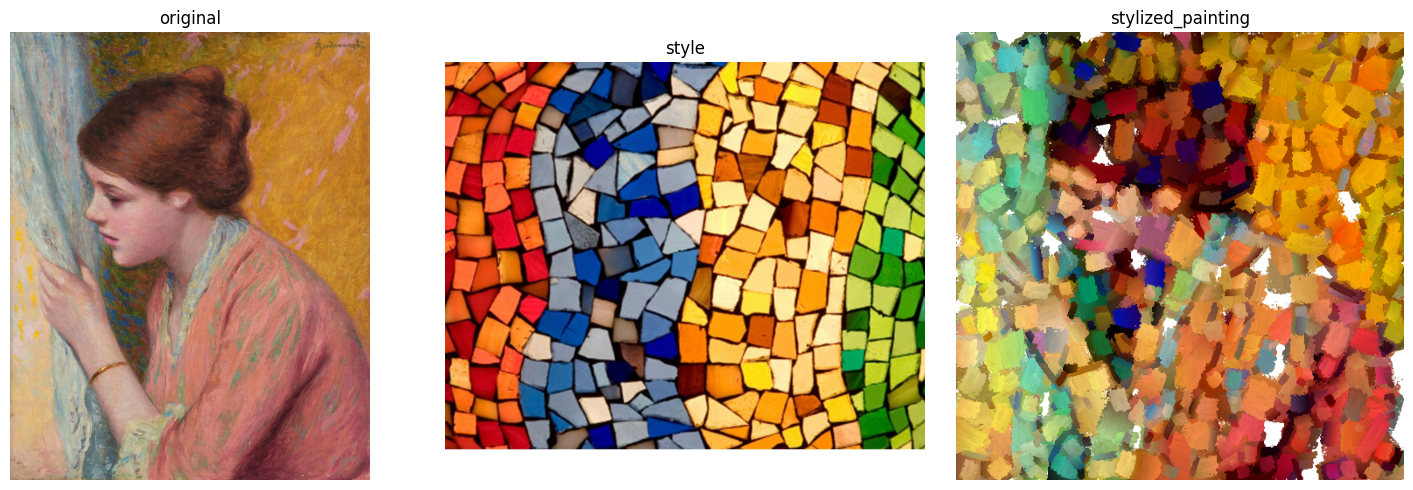

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load images (replace with your image paths)
before = cv2.imread('/content/stylized-neural-painting/test_images/NST_test.jpg')
middle = cv2.imread('/content/stylized-neural-painting/style_images/mosaic.jpg')
after = cv2.imread('/content/stylized-neural-painting/output/NST_test_style_transfer_mosaic.png')

# Convert from BGR to RGB for correct display with matplotlib
before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
middle = cv2.cvtColor(middle, cv2.COLOR_BGR2RGB)
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

# Display images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(before)
plt.title('original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(middle)
plt.title('style')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(after)
plt.title('stylized_painting')
plt.axis('off')

plt.tight_layout()
plt.show()
